<a href="https://colab.research.google.com/github/AngelPn/Netflix-Data-Analysis/blob/main/netflix_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Data Mining Notebook
This notebook deals with data from a well-known content platform and production company, Netflix. The following questions will be answered:
1. Which show type is superior, the movies or the series?
2. Has Netflix invested more in movies or series in recent years?
3. Which country has the most content?
4. What kind of content does each country have?
5. Plot graphs showing the actors with the most movies in
each country. Do the same for the series.
6. Plot a graph that gathers the number of
movies depending on the suggested age. Do the same for the series.
7. If a producer wanted to have a high audience, he thinks it would
be better to make his film at a time when it does not exist much
competition. Plot a graph with the content added per month
to help him choose the right time period.
8. Prepare a chart that summarizes the types of content.
9. Plot graphs showing the directors in each country.
10. Plot graphs showing movies analog to number of seasons.
11. What are the highest rated movies?


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Libraries

In [ ]:
# For large and multi-dimensional arrays
import numpy as np
# For data manipulation and analysis
import pandas as pd
# Natural language processing library
import nltk
# For random selection 
import random
# For data vizualization 
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Load Dataset
Read the data using pandas read_csv method and control missing data.

In [ ]:
# enter the path
Location = r'/content/gdrive/MyDrive/ΤΕΔ/data/netflix_titles.csv'
df = pd.read_csv(Location)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Question 1
Which show type is superior, the movies or the series?

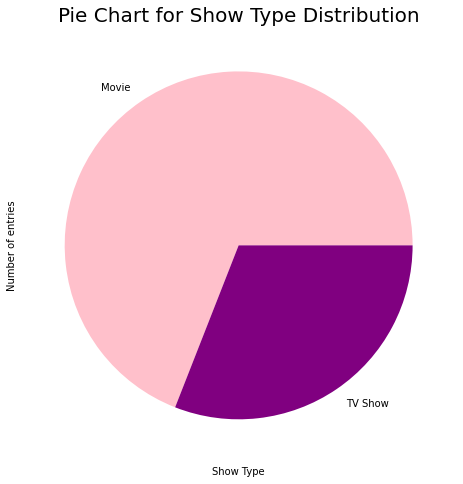

In [ ]:
df['type'].value_counts().plot(kind = 'pie', colors=['pink', 'purple'], figsize = (8, 8))
plt.title('Pie Chart for Show Type Distribution', fontsize = 20)
plt.xlabel('Show Type')
plt.ylabel('Number of entries')
plt.show()

Τhe most common type of shows is 'Movie'

In [ ]:
print('Number of entries for "Movie": {}'.format(max(df['type'].value_counts())))

Number of entries for "Movie": 5377


# Question 2
Has Netflix invested more in movies or series in recent years?

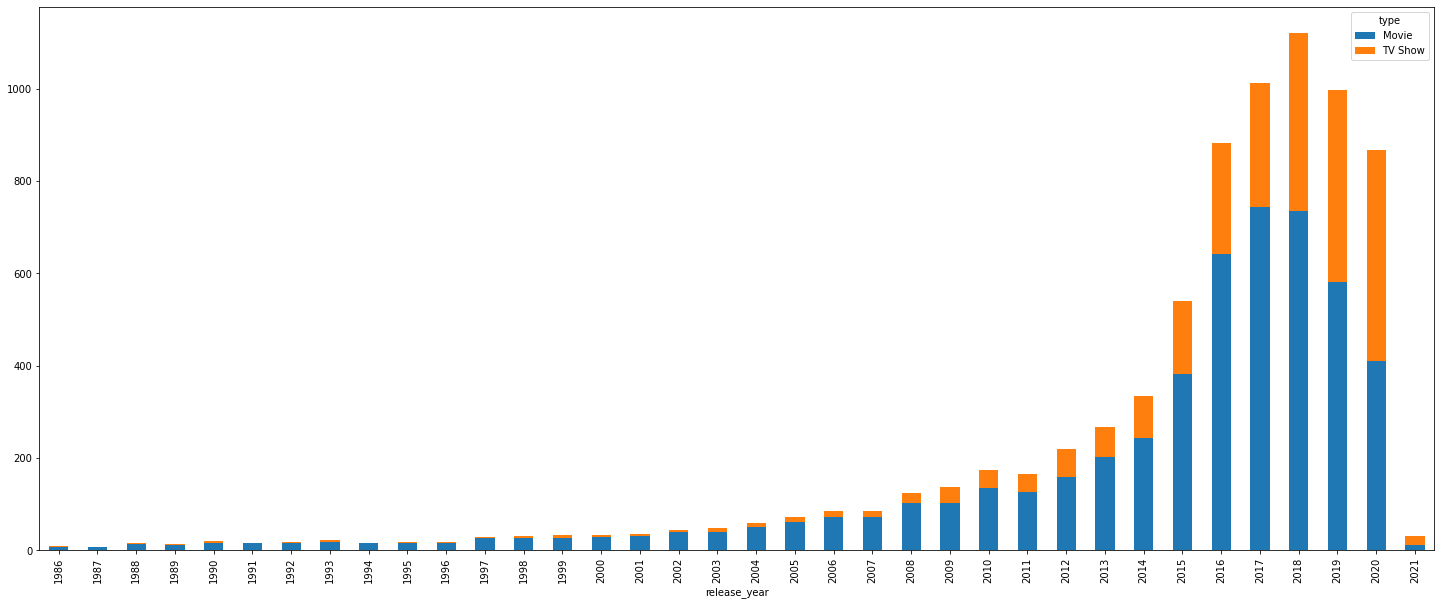

In [ ]:
# select_years = df.loc[df['release_year']>=2016]
# select_netflix = select_years.loc[select_years['description'].str.contains('Netflix') | select_years['title'].str.contains('Netflix')] 
# select_netflix['type'].value_counts().plot(kind = 'pie', colors=['orange', 'red'], figsize = (8, 8))
# plt.title('Pie Chart for Show Type Distribution', fontsize = 20)
# plt.xlabel('Show Type')
# plt.ylabel('Number of entries')
# plt.show()

# labels = df.release_year.unique()
# # movies = groupped[groupped['type'].str.match('Movie')].count()

# tv_shows = groupped[str(groupped['type']) == 'TV show']
# tv_shows

# bar chart 

# groupped = df.groupby(['release_year','type'])
# groupped = groupped['show_id'].count()

df.loc[df['release_year']>=1986].groupby(['release_year','type']).size().unstack().plot(kind = 'bar', figsize = (25, 10), stacked = True)

plt.show()


In recent years, Netflix has invested more in TV shows.

# Question 3
Which country has the most content?

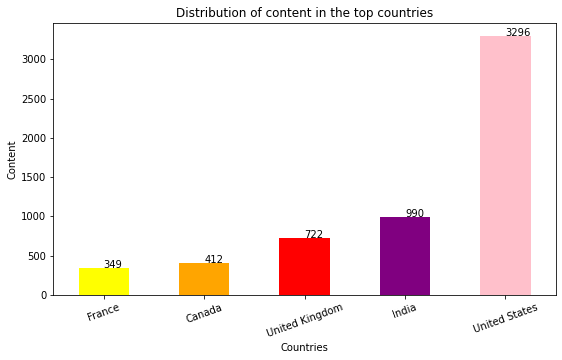

In [ ]:
# Use filter to dismiss NA values from country field
filtered_df = df[~df.country.isna()]

# Create a new dataframe from the series with show_id as the index
# splitting (exploding) columns with multiple countries into multiple rows for each country
new_df = pd.DataFrame(filtered_df.country.str.split(', ').tolist(), index = filtered_df.show_id).stack()
new_df = new_df.reset_index([0, 'show_id'])
new_df.columns = ['show_id', 'Country']

countries = new_df.groupby(by = 'Country')
content = countries['show_id'].count().sort_values().tail(5)

content.plot.bar(color = ['yellow', 'orange', 'red', 'purple', 'pink'], figsize = (9, 5), rot = 0)
for index, value in enumerate(list(content)):
    plt.text(index, value, str(value))
plt.title('Distribution of content in the top countries')
plt.xticks(rotation = 20, horizontalalignment="center")
plt.xlabel('Countries')
plt.ylabel('Content')
plt.show()

United States has the most content with 3296 movies or TV shows.

# Question 4
What kind of content does each country have?

# Question 5
Plot graphs showing the actors with the most movies in each country. Do the same for the series.

In [ ]:
# Use filter to dismiss NA values from country and cast fields
filtered_df = df[~df.country.isna() & ~df.cast.isna()]

# Create a new dataframe from the series with new_df_index as the index
# splitting (exploding) country columns with multiple countries into multiple rows for each country
new_df_index = [filtered_df.show_id, filtered_df.cast, filtered_df.type]
new_df = pd.DataFrame(filtered_df.country.str.split(', ').tolist(), index = new_df_index).stack()
new_df = new_df.reset_index([0, 'show_id', 'cast', 'type'])
new_df.columns = ['show_id', 'cast', 'type', 'country']

# Create a new dataframe from the series with new_df_index as the index
# splitting (exploding) cast column into multiple rows for each actor
new_df_index = [new_df.show_id, new_df.type, new_df.country]
new_df = pd.DataFrame(new_df.cast.str.split(', ').tolist(), index = new_df_index).stack()
new_df = new_df.reset_index([0, 'show_id', 'type', 'country'])
new_df.columns = ['show_id', 'type', 'country', 'actor']
new_df



,show_id,type,country,actor
0,s1,TV Show,Brazil,João Miguel
1,s1,TV Show,Brazil,Bianca Comparato
2,s1,TV Show,Brazil,Michel Gomes
3,s1,TV Show,Brazil,Rodolfo Valente
4,s1,TV Show,Brazil,Vaneza Oliveira
...,...,...,...,...
67587,s7784,Movie,India,Malkeet Rauni
67588,s7784,Movie,India,Anita Shabdish
67589,s7784,Movie,India,Chittaranjan Tripathy
67590,s7786,TV Show,Australia,Adriano Zumbo


## For movies
Τhe actors with the most movies in each country.

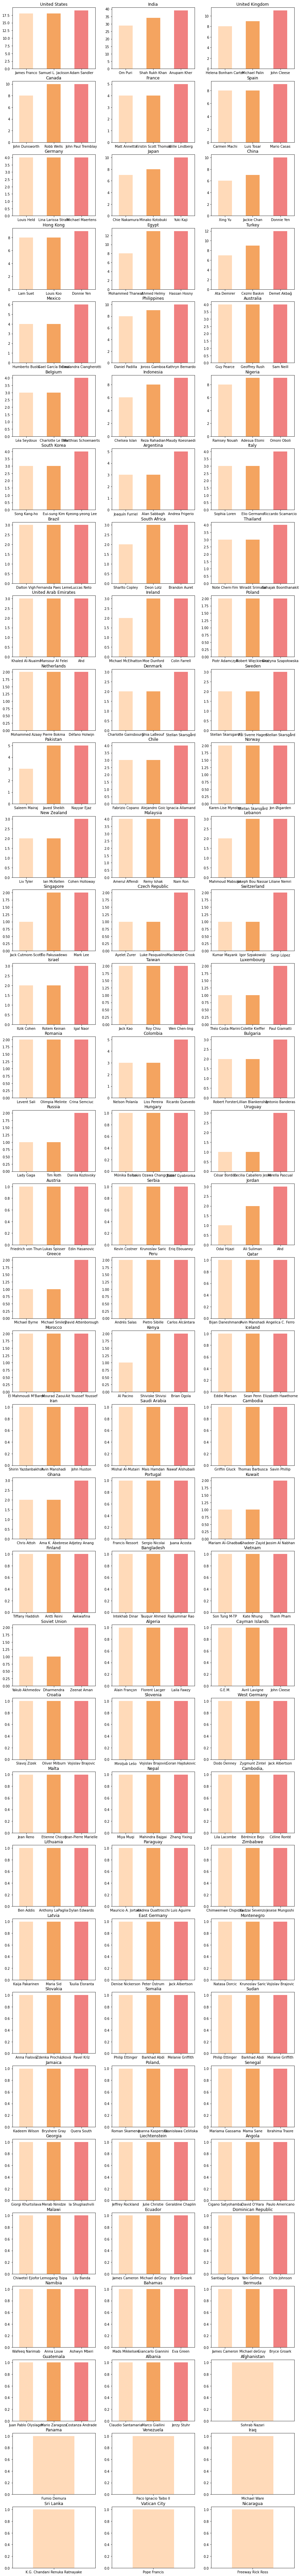

In [ ]:
countries_with_movies = new_df[new_df['type'] == 'Movie']['country'].value_counts().keys().tolist()

fig = plt.figure(figsize = (15, 140))

for idx, country in enumerate(countries_with_movies):
  ax = fig.add_subplot(35, 3, idx+1)
  result = new_df.loc[(new_df['country'] == country) & (new_df['type'] == 'Movie')]['actor'].value_counts().sort_values().tail(3)
  result.plot.bar(color = ['peachpuff', 'sandybrown', 'lightcoral'], rot = 0)
  ax.set_title(country)

plt.show()

## For series
The actors with the most series in each country.

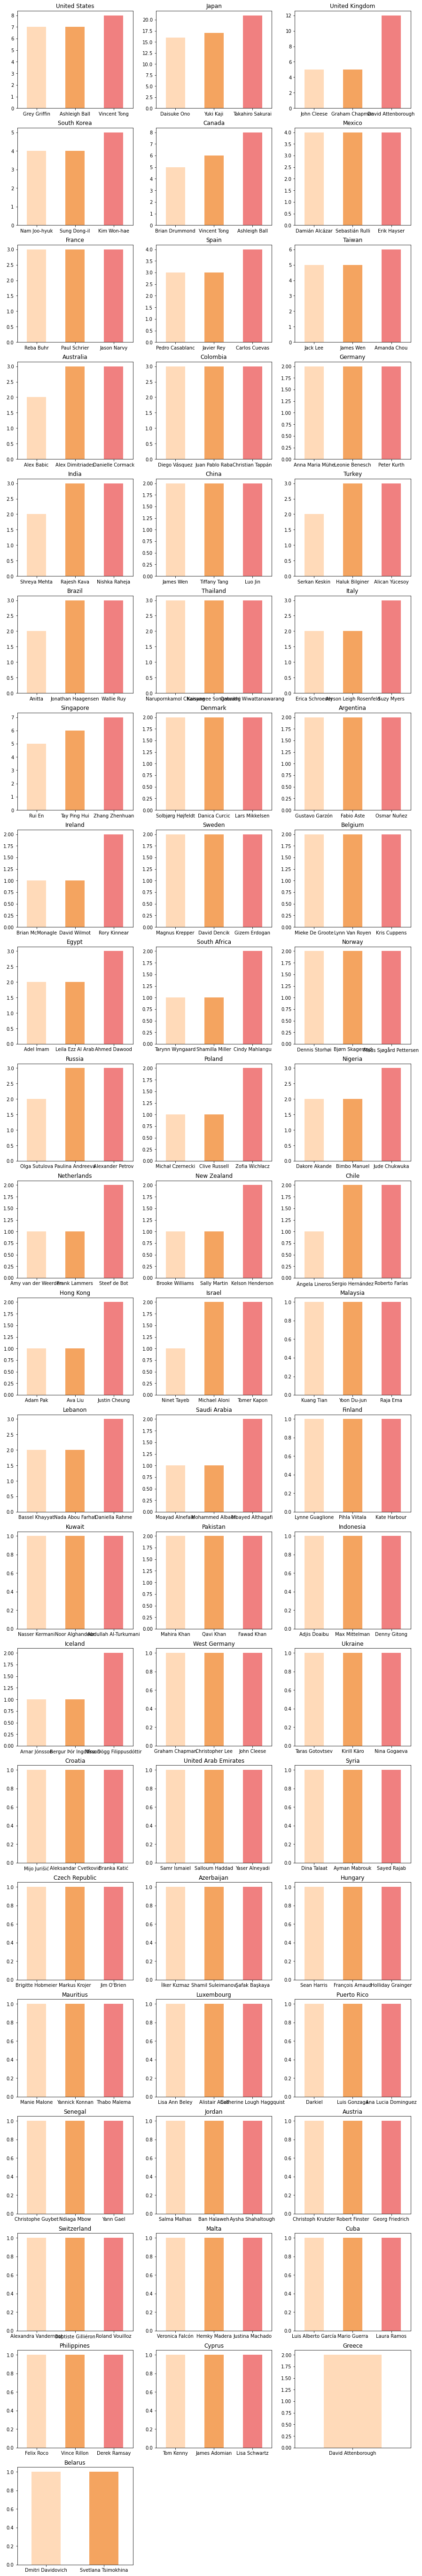

In [ ]:
countries_with_series = new_df[new_df['type'] == 'TV Show']['country'].value_counts().keys().tolist()

fig = plt.figure(figsize = (15, 100))

for idx, country in enumerate(countries_with_series):
  ax = fig.add_subplot(22, 3, idx+1)
  result = new_df.loc[(new_df['country'] == country) & (new_df['type'] == 'TV Show')]['actor'].value_counts().sort_values().tail(3)
  result.plot.bar(color = ['peachpuff', 'sandybrown', 'lightcoral'], rot = 0)
  ax.set_title(country)

plt.show()

# Question 6

# Question 7
If a producer wanted to have a high audience, he thinks it would be better to make his film at a time when it does not exist much competition. Plot a graph with the content added per month to help him choose the right time period.

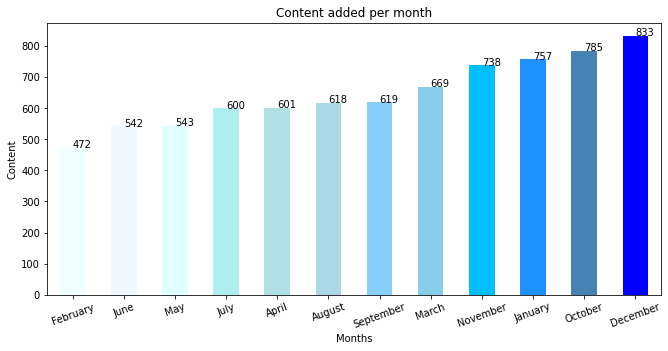

In [ ]:
# Use filter to dismiss NA values from date_added field
filtered_df = df[~df.date_added.isna()]

# Create a new dataframe from the series with show_id as the index
# extracting months
new_df = pd.DataFrame(filtered_df.date_added.str.strip().str.partition(" ")[0].tolist(), index = filtered_df.show_id).stack()
new_df = new_df.reset_index([0, 'show_id'])
new_df.columns = ['show_id', 'month']

group_df = new_df.groupby('month')['show_id'].count().sort_values()
colors = ['azure', 'aliceblue', 'lightcyan', 'paleturquoise', 'powderblue', 'lightblue', 
          'lightskyblue', 'skyblue', 'deepskyblue', 'dodgerblue', 'steelblue', 'blue']
group_df.plot.bar(color = colors, figsize = (11, 5), rot = 0)
for index, value in enumerate(list(group_df)):
    plt.text(index, value, str(value))
plt.title('Content added per month')
plt.xticks(rotation = 20, horizontalalignment="center")
plt.xlabel('Months')
plt.ylabel('Content')
plt.show()


According to plot graph, the producer should make his film in February.

# Question 8

# Question 9
Plot graphs showing the directors in each country.

In [ ]:
# Use filter to dismiss NA values from country and director fields
filtered_df = df[~df.country.isna() & ~df.director.isna()]

# Create a new dataframe from the series with new_df_index as the index
# splitting (exploding) country columns with multiple countries into multiple rows for each country
new_df_index = [filtered_df.show_id, filtered_df.director]
new_df = pd.DataFrame(filtered_df.country.str.split(', ').tolist(), index = new_df_index).stack()
new_df = new_df.reset_index([0, 'show_id', 'director'])
new_df.columns = ['show_id', 'director', 'country']

# Create a new dataframe from the series with show_id as the index
# splitting (exploding) columns with multiple directors into multiple rows for each director
new_df_index = [new_df.show_id, new_df.country]
new_df = pd.DataFrame(new_df.director.str.split(', ').tolist(), index = new_df_index).stack()
new_df = new_df.reset_index([0, 'show_id', 'country'])
new_df.columns = ['show_id', 'country', 'director']
new_df


,show_id,country,director
0,s2,Mexico,Jorge Michel Grau
1,s3,Singapore,Gilbert Chan
2,s4,United States,Shane Acker
3,s5,United States,Robert Luketic
4,s6,Turkey,Serdar Akar
...,...,...,...
7585,s7783,Netherlands,Josef Fares
7586,s7784,India,Mozez Singh
7587,s7787,United Kingdom,Sam Dunn
7588,s7787,Canada,Sam Dunn


## Top directors in each country

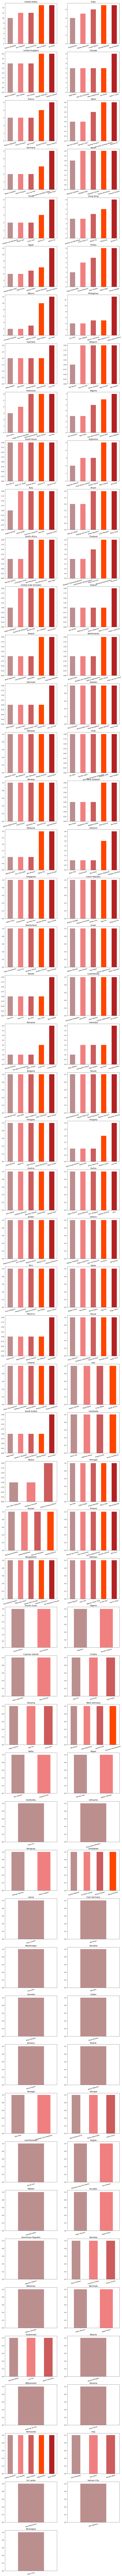

In [ ]:
countries_with_directors = new_df['country'].value_counts().keys().tolist()

fig = plt.figure(figsize = (15, 150))

for idx, country in enumerate(countries_with_movies):
  ax = fig.add_subplot(len(countries_with_directors)/2, 2, idx+1)
  result = new_df.loc[(new_df['country'] == country)]['director'].value_counts().sort_values().tail(5)
  result.plot.bar(color = ['rosybrown', 'lightcoral', 'indianred', 'orangered', 'firebrick'], rot = 0)
  ax.set_title(country, fontsize = 14)
  ax.tick_params('x', labelrotation = 15)

plt.subplots_adjust(top = 2.0)
plt.show()

## Number of directors in each country

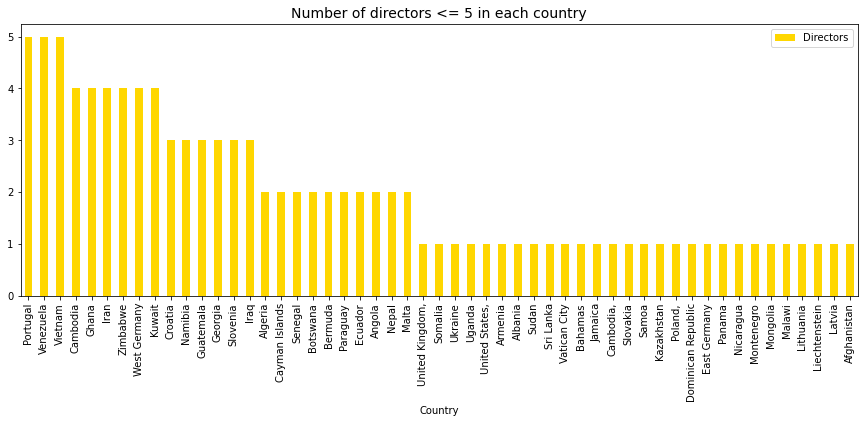

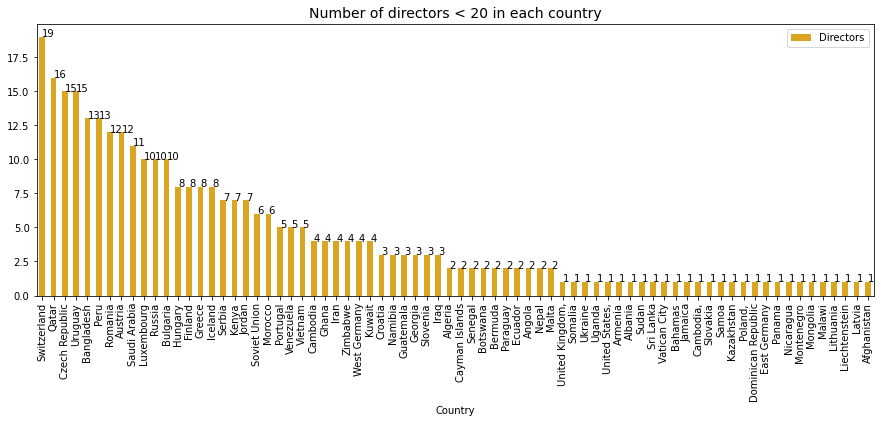

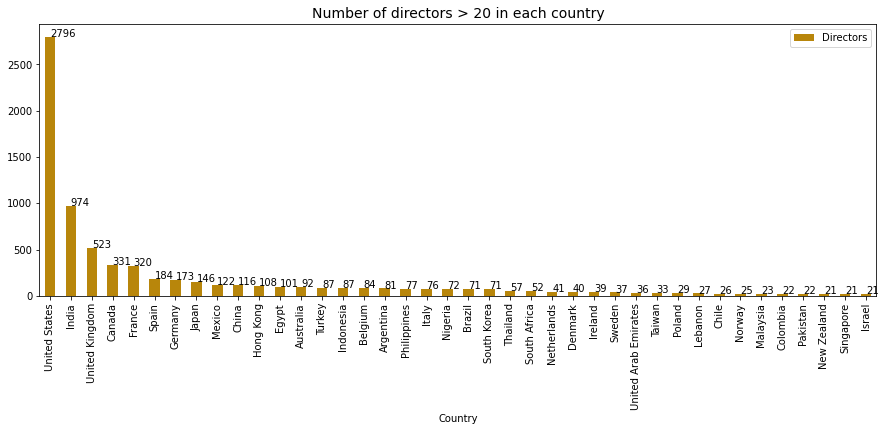

In [118]:
# Get dataframe grouped by country and director 
# in order to keep unique directors in each country
group_df = new_df.groupby(by = ['country', 'director'])['show_id'].count().sort_values()
group_df = group_df.reset_index([0, 'country', 'director'])
group_df.pop('show_id')
# Get dataframe grouped by country
# in order to keep the number of unique directors in each country
group_df = new_df.groupby(by = ['country'])['director'].count().sort_values(ascending = False)
group_df = group_df.reset_index([0, 'country'])
group_df.columns = ['Country', 'Directors']

group1_df = group_df.loc[group_df['Directors'] <= 5]
group1_df.plot.bar(x = 'Country', y = 'Directors', figsize = (15, 5), color = 'gold')
plt.title('Number of directors <= 5 in each country', fontsize = 14)

group2_df = group_df.loc[group_df['Directors'] <= 20]
group2_df.plot.bar(x = 'Country', y = 'Directors', figsize = (15, 5), color = 'goldenrod')
plt.title('Number of directors < 20 in each country', fontsize = 14)
for index, value in enumerate(list(group2_df['Directors'])):
    plt.text(index, value, str(value))

group3_df = group_df.loc[group_df['Directors'] > 20]
group3_df.plot.bar(x = 'Country', y = 'Directors', figsize = (15, 5), color = 'darkgoldenrod')
plt.title('Number of directors > 20 in each country', fontsize = 14)
for index, value in enumerate(list(group3_df['Directors'])):
    plt.text(index, value, str(value))

plt.show()


# Question 10

# Question 11

# Recommendation system